In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20,10)


In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# Now there are lots of unwanted columns we don't want so just drop it 
df2 = df1.drop(['area_type','balcony','availability','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.shape


(13320, 5)

In [8]:
# Now with the cleaning process 
# and we can see that there are 73 values in bath which are null
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# we can drop columns having null value but it delete the whole columns and it is not good for your model
# we can also drop row or change values of all Nan to median of whole columns
df3 = df2.dropna()

In [10]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
# Now that we remove na values we can see in size column some values are with BHK and others are Bedroom
# so let's see some of that values
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
# Now we are going to create new column using lambda functions
df3['bhk'] = df3['size'].apply(lambda x : int(x.split()[0]))

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df3['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13246, dtype: int64

In [15]:
# As you can see we have bhk as a new columns with values as first values of size in integer
df3


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
# Now let's see total_sqft
df3['total_sqft'].unique()
# As we can see that there is a ranged value like 1133-1384 so we took avg of that two values 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# For checking that we use function
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(20)
# So we use ' ~ ' is to negate the values means it outputs the value which is not float
# AS you can see there are values with range, sq metre , sq yards , acres ets 
# we just remove other row with values different from range type

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:return float(x)
    except:None
    

In [22]:
convert_sqft_to_num('5.2Acres')

In [23]:
convert_sqft_to_num('650-30')

340.0

In [24]:
df4 = df3.copy()
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
# Now you can see that all values are now float type in total_sqft 

In [26]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [27]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

# Part 2 Feature engineering 


In [28]:
df5 = df4.copy() 

In [29]:
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
# Now let's see to location to examine it further 
len(df5['location'].unique())

1304

In [31]:
df5['location'] = df5['location'].apply(lambda x : x.strip())

In [32]:
location_stats = df5.groupby('location')['location'].agg('count')
location_stats.head(20)

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Jayanagar                                14
1st Block Koramangala                              10
1st Phase JP Nagar                                 25
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Kri

In [33]:
'''
c = 0
for i in df5['location']:
    if i == '1st Block HRBR Layout':
        print(i)
        c += 1
print(c)
'''

"\nc = 0\nfor i in df5['location']:\n    if i == '1st Block HRBR Layout':\n        print(i)\n        c += 1\nprint(c)\n"

In [34]:
# the location stats we get is the random form update with a bigger to smaller order to analyse it nicely
# so that we can remove the lesser part
location_stats.sort_values(ascending=False,inplace = True)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [35]:
location_stats[location_stats<=10]

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]
len(df5['location'].unique())

1293

In [37]:
df5['location'] = df5['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

len(df5['location'].unique())

242

In [38]:
df5.head(20)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Part 3 Outlier detection and removal 

In [39]:
# Removing those house having  total_sqft/room < 300 as the approx. threshold 
# so we are going to take all with value > 300
df5[(df5.total_sqft/df5.bhk>300)]
# As you can see at all value with threshold of total_sqft / bhk > 300

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [40]:
# Now we are going to remove it 
df6 = df5[(df5.total_sqft/df5.bhk>300)]
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [41]:
# Now we check more outlier for the price_per_sqft value 
df6.price_per_sqft.describe()
# As you can see it's min value is very low and max is very high 
# and we can see that 25%,50% and 75% looks more generic value but 
# And it could be possible but we want to build a generic model for that so that all can use it

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
# Taking the mean and std for each different location 
# and take only values that are greater than mean - std and less than mean + std
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st =np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index =True)
    return df_out
            
df7 = remove_pps_outlier(df6)
df7.shape
        

(10016, 7)

In [43]:
# previous value of price_per_sqft
df6.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
# After the function apply in it and now it is more normal distributed
df7.price_per_sqft.describe()

count    10016.000000
mean      5625.892458
std       2212.039002
min       1250.000000
25%       4247.750685
50%       5165.338612
75%       6388.888889
max      24509.803922
Name: price_per_sqft, dtype: float64

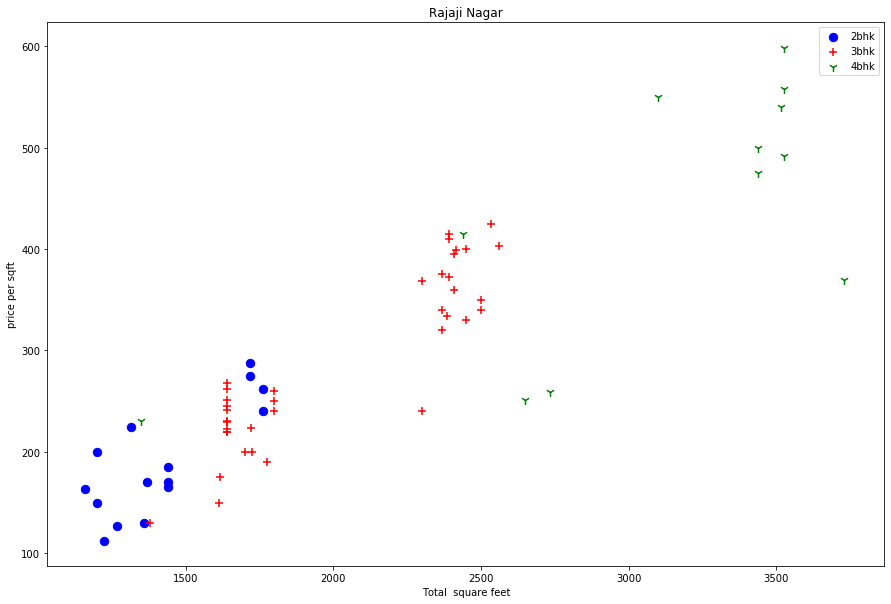

In [45]:
# Now if we see from some value in bhk and price there is huge difference where 
# 2bhk is more costly then 3bhk with same total_sqft and at same location 
# so we use function that plot a scatter plot between 2 and 3 bhk
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location  == location) & (df.bhk == 2)]
    bhk3 = df[(df.location  == location) & (df.bhk == 3)]
    bhk4 = df[(df.location  == location) & (df.bhk == 4)]
    matplotlib.rcParams['figure.figsize']  =(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,s = 70,color = 'blue',label = '2bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,s = 60,marker = '+',color = 'red',label = '3bhk')
    plt.scatter(bhk4.total_sqft,bhk4.price,s = 80,marker = '1',color = 'green',label = '4bhk')
    plt.xlabel('Total  square feet')
    plt.ylabel('price per sqft')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")
# Now by examining the plot we can say there were some point where 4bhk has very low price and some 2bhk and 3bhk also have 
# price for different total sqft

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df7.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

In [47]:
df8 = remove_bhk_outliers(df7)
df8.shape
# As we can see lot of values have been removed 

(7164, 7)

In [48]:
df7.shape

(10016, 7)

In [49]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10007,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10008,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10011,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10012,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


Text(0, 0.5, 'Count')

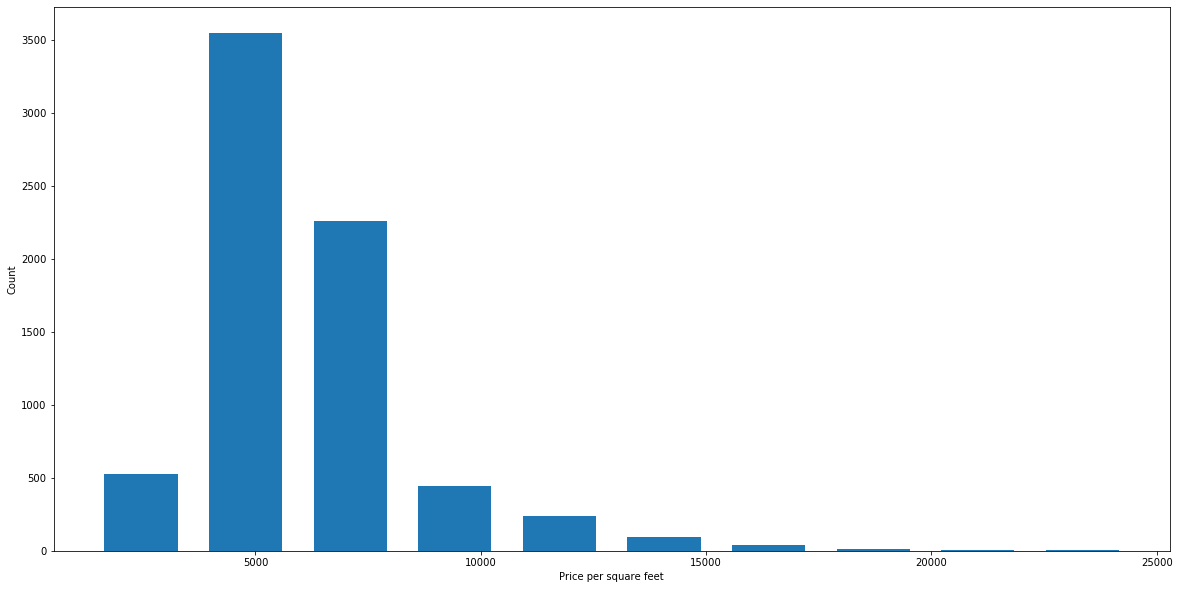

In [50]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.7)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [51]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10007,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10008,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10011,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10012,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [52]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
df8[df8.bath>7]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
34,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
1249,Bommanahalli,8 Bedroom,3000.0,8.0,140.0,8,4666.666667
2924,Hennur Road,8 Bedroom,5000.0,8.0,250.0,8,5000.000000
3139,Horamavu Banaswadi,6 Bedroom,3800.0,8.0,200.0,6,5263.157895
3401,Indira Nagar,8 Bedroom,3250.0,8.0,600.0,8,18461.538462
3654,KR Puram,9 BHK,4600.0,9.0,200.0,9,4347.826087
4976,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200.000000
5099,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5138,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5372,R.T. Nagar,9 Bedroom,3600.0,8.0,165.0,9,4583.333333


In [54]:
# We are going to remove some value for bath room where no of bath > no of bhk
df8[df8.bath>df8.bhk+2]
# So we are going to remove it

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1565,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5099,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6562,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8232,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [55]:
df9 = df8[df8.bath<df8.bhk+2]
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10007,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10008,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10011,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10012,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [56]:
# Now that we have a disent no of row we are going to prepare for the model 
# but before that we are going to remove some unnecessary column
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10
# now this is the final df we want

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10007,other,1200.0,2.0,70.0,2
10008,other,1800.0,1.0,200.0,1
10011,other,1353.0,2.0,110.0,2
10012,other,812.0,1.0,26.0,1


# Model Building

In [57]:
# for building model we use
# 1. K4 cross validation :- Cross-validation is a technique to evaluate predictive models by 
#    partitioning the original sample into a training set to train the model, and a test set to evaluate it.

# 2. Grid SearchCV :- GridSearchCV is a library function that is a member of sklearn's model_selection package. 
#    It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.
#    In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters

In [58]:
# this is our data frame 
# As you can see df10 has location columns as non numerical value 
# and machine learning model doesn't work with non numerical value
# that's why we are going to use one hot encoding that create dummies columns of all non numerical value

In [59]:
# for creating dummies we use dummy columns
dummies = pd.get_dummies(df10.location)
dummies.head(40)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11  = pd.concat([df10,dummies.drop('other',axis ='columns')],axis = 'columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10008,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10011,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10012,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df12 = df11.drop('location',axis = 'columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10008,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10011,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10012,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Now for model training we need to take only independent variable for 
# that's why we are going to drop the dependent variable which is price
X = df12.drop('price',axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10008,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10011,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10012,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y = df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10007     70.0
10008    200.0
10011    110.0
10012     26.0
10015    400.0
Name: price, Length: 7088, dtype: float64

In [64]:
# Now that we have X and y we want to split train and test data 
# for that we use sklearn
from  sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size = 0.2 ,random_state=10)

In [65]:
X_train.shape

(5670, 244)

In [66]:
X_test.shape

(1418, 244)

In [67]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)
# As we get 87 % accuracy which is pretty good 

0.8751466170466222

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = .2 , random_state= 0)

cross_val_score(LinearRegression(), X, y ,cv= cv)

array([0.86195477, 0.86419585, 0.82068946, 0.82709117, 0.89136565])

In [69]:
# There were many different rigressers that we can use 
# and gridsearch cv is a great api that let you iterate through them 
# and find the best perameter 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
            
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha' :[1,2],
                'selection':['random','cyclic']
            }
        },
        'descision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion' :['mse','friedman_mse'],
                'splitter' :[ 'best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2 , random_state = 0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv = cv ,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853059,{'normalize': False}
1,lasso,0.706991,"{'alpha': 1, 'selection': 'random'}"
2,descision_tree,0.769668,"{'criterion': 'mse', 'splitter': 'best'}"


In [70]:
# AS we can see above -^- our linear regression model does the best job with
# normalize = false
# now we predict price

In [71]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]
    

In [72]:
predict_price('1st Block Jayanagar',1700,2,1)

263.65522515089884

In [73]:
predict_price('1st Block Jayanagar',1700,2,1)

263.65522515089884

In [74]:
predict_price("Whitefield",1700,2,1)

114.12000554151943

In [75]:
# Now our model is done and now we want to export it into a pickle file
# which then feed to a python flask server 

In [76]:
import pickle 
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [77]:
# and we need allthe extra things like columns that we want into json file
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))